In [67]:
# Ensure matplotlib inline mode is enabled
%matplotlib inline

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import clustering algorithms and data preprocessing tools from scikit-learn
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

# Import HDBSCAN clustering algorithm
import hdbscan

In [85]:
# Data Import
star_data = pd.read_csv("star_data/filtered_stars.csv")

In [86]:
# Data Cleaning
star_data_clean = star_data.dropna(how='all')
star_data_clean = star_data.fillna(0) 
type(star_data_clean)

pandas.core.frame.DataFrame

In [88]:
star_data_clean['U']

0      -14.527353
1        7.911635
2      -35.152848
3       44.409299
4       21.559445
          ...    
586    -43.639656
587   -154.924803
588   -177.727346
589   -125.610253
590    -41.781086
Name: U, Length: 591, dtype: float64

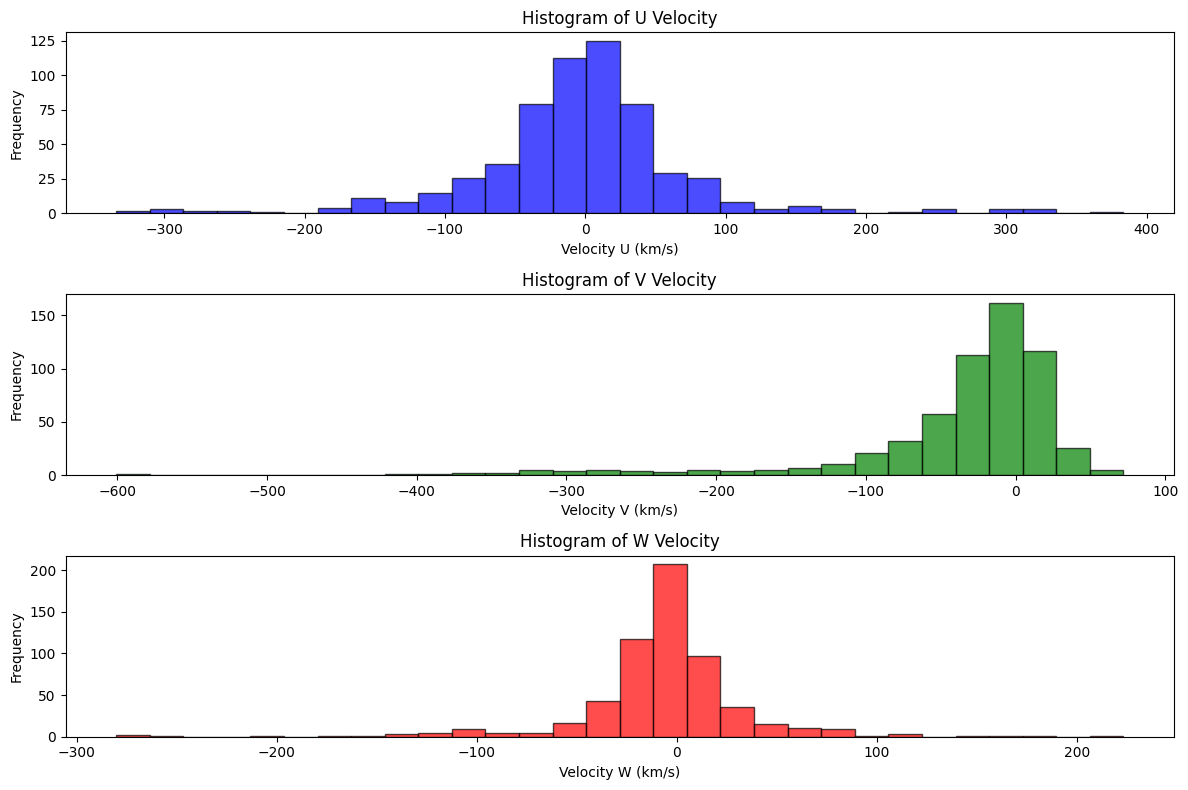

In [89]:
U = star_data_clean['U']  
V = star_data_clean['V']  
W = star_data_clean['W']  

# Set up the figure and subplots
plt.figure(figsize=(12, 8))

# Plot histogram for U velocity
plt.subplot(3, 1, 1)
plt.hist(U, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of U Velocity')
plt.xlabel('Velocity U (km/s)')
plt.ylabel('Frequency')

# Plot histogram for V velocity
plt.subplot(3, 1, 2)
plt.hist(V, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of V Velocity')
plt.xlabel('Velocity V (km/s)')
plt.ylabel('Frequency')

# Plot histogram for W velocity
plt.subplot(3, 1, 3)
plt.hist(W, bins=30, color='red', alpha=0.7, edgecolor='black')
plt.title('Histogram of W Velocity')
plt.xlabel('Velocity W (km/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [109]:
# Define the first feature set with angular momentum components and the mean orbital energy for clustering
feature_set1 = ["j_phi(kpc s^(-1))", "j_r(kpc km s^-1)", "j_z(kpc km s^(-1))", "energy_mean(km^2 s^(-2))"]

# Define the second feature set with the standard deviations of the angular momentum components and orbital energy
feature_set2 = ["j_phi_std(kpc km s^(-1))", "j_r_std(kpc km s^-1)", "j_z_std(kpc km s^-1)", "energy_std(km^2 s^(-2))"]

# Define the third feature set, expanding feature_set2 by adding the standard deviations of velocity components
feature_set3 = ["j_phi_std(kpc km s^(-1))", "j_r_std(kpc km s^-1)", "j_z_std(kpc km s^(-1))", 
                "energy_std(km^2 s^(-2))", "v_z_std(km/s)", "v_r_std(km/s)", "v_phi_std(km/s)"]

# Apply KMeans clustering with 3 clusters on the cleaned star data
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(star_data_clean)

# Feature Set 1:
# j_phi (kpc s^(-1)) → "Rotation around the Galaxy"
# j_r (kpc km s^-1) → "Movement towards/away from Galaxy Center"
# j_z (kpc km s^(-1)) → "Up/Down Movement in Galaxy"
# energy_mean (km^2 s^(-2)) → "Average Energy of Stars"

# Feature Set 2:
# j_phi_std (kpc km s^(-1)) → "Variation in Rotation"
# j_r_std (kpc km s^-1) → "Variation in Radial Movement"
# j_z_std (kpc km s^(-1)) → "Variation in Up/Down Movement"
# energy_std (km^2 s^(-2)) → "Variation in Energy"


# Retrieve the cluster centers from the KMeans algorithm
# kmeans.cluster_centers_

In [91]:
# Print the columns of the cleaned DataFrame
print("Columns in star_data_clean:", star_data_clean.columns)

# Check if the columns in feature_set1 are correct
for feature in feature_set1:
    if feature not in star_data_clean.columns:
        print(f"Warning: Column {feature} is not found in the DataFrame.")

Columns in star_data_clean: Index(['source_id', 'ra', 'ra_error', 'dec', 'dec_error', 'pmra', 'pmra_error',
       'pmdec', 'pmdec_error', 'pmra_pmdec_corr', 'parallax', 'parallax_error',
       'phot_g_mean_mag', 'bp_rp', 'dr2_radial_velocity',
       'dr2_radial_velocity_error', 'U', 'V', 'W', 'T', 'Prograde', 'V-500'],
      dtype='object')


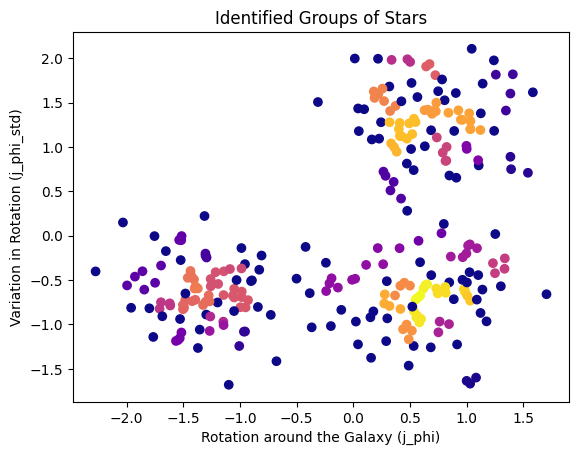

In [113]:
# Scale the dataset
# Generating some blob data for clustering
centers = [[1, 1], [-1, -1], [1, -1]]
star_data, labels_true = make_blobs(
    n_samples=280, centers=centers, cluster_std=0.4, random_state=0
)

# Standardizing the data
scaler = StandardScaler()
scaled_star_data = scaler.fit_transform(star_data_clean)

star_data = StandardScaler().fit_transform(star_data)

# Apply HDBSCAN clustering algorithm
clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
cluster_labels = clusterer.fit_predict(star_data)



# Plot the clustered data (optional, for visualization)
plt.scatter(star_data[:, 0], star_data[:, 1], c=cluster_labels, cmap='plasma')
plt.title('Identified Groups of Stars')

plt.xlabel('Rotation around the Galaxy (j_phi)')
plt.ylabel('Variation in Rotation (j_phi_std)')
plt.show()

In [107]:
# Experiment with different min_cluster_size and min_samples
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=3)
labels = clusterer.fit_predict(scaled_star_data)

# Get the number of unique clusters (excluding noise points labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found: {n_clusters}")

Number of clusters found: 12
